In [3]:
# feature extractoring and preprocessing data
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
from PIL import Image
import pathlib
import csv

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

#Keras
import keras

from keras.models import Sequential 
import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [4]:
## converting audio to images i.e. spectrograms

cmap = plt.get_cmap('inferno')
plt.figure(figsize=(8,8))
genres = 'blues classical country disco hiphop jazz metal pop reggae rock'.split()
for g in genres:
    pathlib.Path(f'C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/img_data/{g}').mkdir(parents=True, exist_ok=True)
    for filename in os.listdir(f'C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/genres_original/{g}'):
        songname = f'C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/genres_original/{g}/{filename}'
        y, sr = librosa.load(songname, mono=True, duration=5)
        plt.specgram(y, NFFT=2048, Fs=2, Fc=0, noverlap=128, cmap=cmap, sides='default', mode='default', scale='dB');
        plt.axis('off');
        plt.savefig(f'C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/img_data/{g}/{filename[:-3].replace(".", "")}.png')
        plt.clf()

<Figure size 576x576 with 0 Axes>

In [5]:
## creating headers for csv

header = 'filename chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
for i in range(1, 21):
    header += f' mfcc{i}'
header += ' label'
header = header.split()

In [6]:
## Extracting features from Spectrogram: We will extract Mel-frequency cepstral coefficients (MFCC), 
##Spectral Centroid, Zero Crossing Rate, Chroma Frequencies, and Spectral Roll-off.

file = open('dataset.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)
genres = 'blues classical country disco hiphop jazz metal pop reggae rock'.split()
for g in genres:
    for filename in os.listdir(f'C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/genres_original/{g}'):
        songname = f'C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/genres_original/{g}/{filename}'
        y, sr = librosa.load(songname, mono=True, duration=30)
        rmse = librosa.feature.rms(y=y)[0]
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
        spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
        spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(y)
        mfcc = librosa.feature.mfcc(y=y, sr=sr)
        to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
        for e in mfcc:
            to_append += f' {np.mean(e)}'
        to_append += f' {g}'
        file = open('dataset.csv', 'a', newline='')
        with file:
            writer = csv.writer(file)
            writer.writerow(to_append.split())

In [4]:
### Data preprocessing: It involves loading CSV data, label encoding, 
##feature scaling and data split into training and test set.

data = pd.read_csv('C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/Code/dataset.csv')
data.head()
# Dropping unneccesary columns
data = data.drop(['filename'],axis=1)
#Encoding the Labels
genre_list = data.iloc[:, -1]
encoder = LabelEncoder()
y = encoder.fit_transform(genre_list)
#Scaling the Feature columns
scaler = StandardScaler()
X = scaler.fit_transform(np.array(data.iloc[:, :-1], dtype = float))#Dividing data into training and Testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [16]:
## creating validation data

A = X_train
b = y_train

X_t, X_v, y_t, y_v = train_test_split(A, b, test_size=0.2)

In [17]:
data.head()

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,0.349943,0.130225,1784.420446,2002.650192,3806.485316,0.083066,-113.596748,121.557297,-19.158825,42.351032,...,8.810669,-3.667368,5.751691,-5.162763,0.750948,-1.691938,-0.409953,-2.300209,1.219929,blues
1,0.340983,0.095918,1529.835316,2038.617579,3548.820207,0.056044,-207.556793,124.006721,8.930560,35.874687,...,5.376803,-2.239120,4.216963,-6.012273,0.936110,-0.716537,0.293876,-0.287431,0.531573,blues
2,0.363603,0.175573,1552.481958,1747.165985,3040.514948,0.076301,-90.754387,140.459900,-29.109968,31.689013,...,5.789265,-8.905224,-1.083720,-9.218359,2.455806,-7.726901,-1.815723,-3.433434,-2.226821,blues
3,0.404779,0.141191,1070.119953,1596.333948,2185.028454,0.033309,-199.431152,150.099213,5.647593,26.871927,...,6.087677,-2.476421,-1.073890,-2.874778,0.780977,-3.316932,0.637982,-0.619690,-3.408233,blues
4,0.308590,0.091563,1835.494603,1748.362448,3580.945013,0.101500,-160.266037,126.198807,-35.605450,22.153301,...,-2.806384,-6.934123,-7.558618,-9.173553,-4.512165,-5.453538,-0.924161,-4.409333,-11.703781,blues


In [12]:
### ANN
from keras.models import Sequential
from keras import layers
from keras.layers import Dense, Activation

model = Sequential()

model.add(layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
history = model.fit(X_t,
                    y_t,
                    epochs=20,validation_data=(X_v, y_v),
                    batch_size=128)


Train on 639 samples, validate on 160 samples
Epoch 1/20
639/639 [==============================] - 0s 26us/step - loss: 0.5090 - accuracy: 0.8529 - val_loss: 0.4844 - val_accuracy: 0.8687
Epoch 2/20
639/639 [==============================] - 0s 23us/step - loss: 0.4844 - accuracy: 0.8623 - val_loss: 0.5135 - val_accuracy: 0.8687
Epoch 3/20
639/639 [==============================] - 0s 20us/step - loss: 0.4507 - accuracy: 0.8764 - val_loss: 0.5175 - val_accuracy: 0.8562
Epoch 4/20
639/639 [==============================] - 0s 25us/step - loss: 0.4311 - accuracy: 0.8826 - val_loss: 0.5315 - val_accuracy: 0.8438
Epoch 5/20
639/639 [==============================] - 0s 22us/step - loss: 0.4029 - accuracy: 0.8983 - val_loss: 0.5404 - val_accuracy: 0.8375
Epoch 6/20
639/639 [==============================] - 0s 25us/step - loss: 0.3842 - accuracy: 0.8951 - val_loss: 0.5322 - val_accuracy: 0.8375
Epoch 7/20
639/639 [==============================] - 0s 23us/step - loss: 0.3662 - accuracy: 0.

In [19]:
test_loss, test_acc = model.evaluate(X_test,y_test)

200/200 [==============================] - 0s 50us/step


In [111]:
print('test_acc: ',test_acc)
print('test_acc: ',test_loss)

test_acc:  0.625
test_acc:  1.13652615070343


In [21]:
## predictions
predictions = model.predict(X_test)

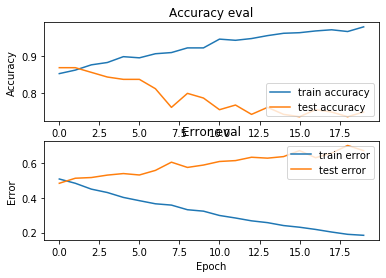

In [22]:
## plot accuracy and Error plot

def plot_history(history):
    """Plots accuracy/loss for training/validation set as a function of the epochs
        :param history: Training history of model
        :return:
    """

    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()
    
plot_history(history)

In [25]:
b = predictions

s = b.tolist()

t = []
for i in range(len(s)):
    f = s[i]
    t.append(f.index(max(f)))

In [26]:
## evaluation of ANN

y_pred = t

import numpy
import tensorflow as tf
tf.executing_eagerly()

m = tf.keras.metrics.Accuracy() 
_ = m.update_state(y_test, y_pred)
print("ACC: ",m.result().numpy())

m = tf.keras.metrics.MeanAbsoluteError() 
_ = m.update_state(y_test, y_pred) 
print("MSE: ",m.result().numpy())


m = tf.keras.metrics.RootMeanSquaredError()
m.update_state(y_test, y_pred)
print('RMSE: ', m.result().numpy())

ACC:  0.625
MSE:  1.475
RMSE:  2.7138534


CNN on Images

In [27]:
from keras import layers
from keras.layers import Activation, Dense, Dropout, Conv2D, Flatten, MaxPooling2D, GlobalMaxPooling2D, GlobalAveragePooling1D, AveragePooling2D, Input, Add
from keras.models import Sequential
from keras.optimizers import SGD

In [28]:
## spiling of images data

import split_folders

# To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.
split_folders.ratio('C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/img_data/', output="C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/img_data/OPdata", seed=1337, ratio=(.8, .2)) # default values

Copying files: 999 files [00:03, 281.71 files/s]


In [29]:
## image agumentation

from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255, # rescale all pixel values from 0-255, so aftre this step all our pixel values are in range (0,1)
        shear_range=0.2, #to apply some random tranfromations
        zoom_range=0.2, #to apply zoom
        horizontal_flip=True) # image will be flipper horiz
test_datagen = ImageDataGenerator(rescale=1./255)

In [31]:
### image data generator

training_set = train_datagen.flow_from_directory(
        'C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/img_data/OPdata/train',
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical',
        shuffle = False)
test_set = test_datagen.flow_from_directory(
        'C:/Users/Lenovo/Desktop/NCI/Semester 2/Data Mining and Machine Learning 2/img_data/OPdata/val',
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical',
        shuffle = False )

Found 799 images belonging to 10 classes.
Found 200 images belonging to 10 classes.


In [36]:
#### implementation of CNN

model = Sequential()
input_shape=(64, 64, 3)
#1st hidden layer
model.add(Conv2D(32, (3, 3), strides=(2, 2), input_shape=input_shape))
model.add(AveragePooling2D((2, 2), strides=(2,2)))
model.add(Activation('relu'))
#2nd hidden layer
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(AveragePooling2D((2, 2), strides=(2,2)))
model.add(Activation('relu'))
#3rd hidden layer
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(AveragePooling2D((2, 2), strides=(2,2)))
model.add(Activation('relu'))
#Flatten
model.add(Flatten())
model.add(Dropout(rate=0.5))
#Add fully connected layer.
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(rate=0.5))
#Output layer
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 31, 31, 32)        896       
_________________________________________________________________
average_pooling2d_7 (Average (None, 15, 15, 32)        0         
_________________________________________________________________
activation_11 (Activation)   (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
average_pooling2d_8 (Average (None, 7, 7, 64)          0         
_________________________________________________________________
activation_12 (Activation)   (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 7, 7, 64)         

In [37]:
## compile

epochs = 200
batch_size = 8
learning_rate = 0.01
decay_rate = learning_rate / epochs
momentum = 0.9
sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
model.compile(optimizer="sgd", loss="categorical_crossentropy", metrics=['accuracy'])

In [38]:
model.fit_generator(
        training_set,
        steps_per_epoch=100,
        epochs=50,
        validation_data=test_set,
        validation_steps=200)

Epoch 1/50
100/100 [==============================] - ETA: 39s - loss: 2.2574 - accuracy: 0.187 - ETA: 27s - loss: 2.2458 - accuracy: 0.187 - ETA: 27s - loss: 2.2587 - accuracy: 0.135 - ETA: 27s - loss: 2.2820 - accuracy: 0.117 - ETA: 26s - loss: 2.2802 - accuracy: 0.118 - ETA: 26s - loss: 2.2974 - accuracy: 0.114 - ETA: 25s - loss: 2.3028 - accuracy: 0.103 - ETA: 24s - loss: 2.2959 - accuracy: 0.113 - ETA: 24s - loss: 2.2935 - accuracy: 0.108 - ETA: 24s - loss: 2.2842 - accuracy: 0.112 - ETA: 23s - loss: 2.2833 - accuracy: 0.114 - ETA: 23s - loss: 2.2961 - accuracy: 0.104 - ETA: 22s - loss: 2.3006 - accuracy: 0.101 - ETA: 22s - loss: 2.3112 - accuracy: 0.094 - ETA: 22s - loss: 2.3187 - accuracy: 0.087 - ETA: 22s - loss: 2.3237 - accuracy: 0.082 - ETA: 21s - loss: 2.3209 - accuracy: 0.079 - ETA: 21s - loss: 2.3205 - accuracy: 0.081 - ETA: 21s - loss: 2.3242 - accuracy: 0.077 - ETA: 20s - loss: 2.3259 - accuracy: 0.073 - ETA: 20s - loss: 2.3284 - accuracy: 0.071 - ETA: 20s - loss: 2.330

100/100 [==============================] - ETA: 2s - loss: 2.3063 - accuracy: 0.06 - ETA: 2s - loss: 2.2724 - accuracy: 0.29 - ETA: 2s - loss: 2.2894 - accuracy: 0.19 - ETA: 2s - loss: 2.2950 - accuracy: 0.14 - ETA: 3s - loss: 2.2985 - accuracy: 0.12 - ETA: 4s - loss: 2.2997 - accuracy: 0.11 - ETA: 5s - loss: 2.2989 - accuracy: 0.12 - ETA: 6s - loss: 2.3027 - accuracy: 0.11 - ETA: 7s - loss: 2.3008 - accuracy: 0.12 - ETA: 8s - loss: 2.3014 - accuracy: 0.11 - ETA: 9s - loss: 2.3026 - accuracy: 0.11 - ETA: 9s - loss: 2.3019 - accuracy: 0.11 - ETA: 10s - loss: 2.3035 - accuracy: 0.109 - ETA: 10s - loss: 2.3035 - accuracy: 0.108 - ETA: 11s - loss: 2.3030 - accuracy: 0.110 - ETA: 11s - loss: 2.3036 - accuracy: 0.107 - ETA: 11s - loss: 2.3045 - accuracy: 0.104 - ETA: 11s - loss: 2.3046 - accuracy: 0.106 - ETA: 11s - loss: 2.3039 - accuracy: 0.107 - ETA: 12s - loss: 2.3047 - accuracy: 0.104 - ETA: 12s - loss: 2.3050 - accuracy: 0.101 - ETA: 12s - loss: 2.3051 - accuracy: 0.098 - ETA: 12s - lo

Epoch 8/50
100/100 [==============================] - ETA: 3s - loss: 2.2387 - accuracy: 0.50 - ETA: 3s - loss: 2.2090 - accuracy: 0.43 - ETA: 2s - loss: 2.2509 - accuracy: 0.26 - ETA: 2s - loss: 2.2485 - accuracy: 0.22 - ETA: 2s - loss: 2.2631 - accuracy: 0.19 - ETA: 2s - loss: 2.2642 - accuracy: 0.18 - ETA: 3s - loss: 2.2609 - accuracy: 0.19 - ETA: 5s - loss: 2.2708 - accuracy: 0.18 - ETA: 6s - loss: 2.2751 - accuracy: 0.17 - ETA: 8s - loss: 2.2753 - accuracy: 0.17 - ETA: 9s - loss: 2.2806 - accuracy: 0.16 - ETA: 9s - loss: 2.2805 - accuracy: 0.15 - ETA: 10s - loss: 2.2836 - accuracy: 0.147 - ETA: 10s - loss: 2.2885 - accuracy: 0.140 - ETA: 11s - loss: 2.2912 - accuracy: 0.133 - ETA: 11s - loss: 2.2915 - accuracy: 0.126 - ETA: 11s - loss: 2.2888 - accuracy: 0.132 - ETA: 12s - loss: 2.2889 - accuracy: 0.134 - ETA: 12s - loss: 2.2927 - accuracy: 0.130 - ETA: 12s - loss: 2.2870 - accuracy: 0.142 - ETA: 12s - loss: 2.2877 - accuracy: 0.139 - ETA: 12s - loss: 2.2850 - accuracy: 0.139 - ET

100/100 [==============================] - ETA: 3s - loss: 2.3276 - accuracy: 0.09 - ETA: 3s - loss: 2.3321 - accuracy: 0.06 - ETA: 2s - loss: 2.2868 - accuracy: 0.08 - ETA: 2s - loss: 2.2634 - accuracy: 0.11 - ETA: 2s - loss: 2.2504 - accuracy: 0.11 - ETA: 2s - loss: 2.2638 - accuracy: 0.10 - ETA: 3s - loss: 2.2744 - accuracy: 0.10 - ETA: 5s - loss: 2.2728 - accuracy: 0.10 - ETA: 6s - loss: 2.2729 - accuracy: 0.11 - ETA: 8s - loss: 2.2642 - accuracy: 0.12 - ETA: 8s - loss: 2.2681 - accuracy: 0.12 - ETA: 9s - loss: 2.2639 - accuracy: 0.12 - ETA: 10s - loss: 2.2735 - accuracy: 0.120 - ETA: 11s - loss: 2.2796 - accuracy: 0.115 - ETA: 11s - loss: 2.2730 - accuracy: 0.128 - ETA: 11s - loss: 2.2678 - accuracy: 0.140 - ETA: 12s - loss: 2.2682 - accuracy: 0.139 - ETA: 12s - loss: 2.2717 - accuracy: 0.133 - ETA: 12s - loss: 2.2619 - accuracy: 0.146 - ETA: 12s - loss: 2.2656 - accuracy: 0.142 - ETA: 13s - loss: 2.2722 - accuracy: 0.137 - ETA: 13s - loss: 2.2717 - accuracy: 0.139 - ETA: 13s - lo

100/100 [==============================] - ETA: 2s - loss: 2.3985 - accuracy: 0.06 - ETA: 2s - loss: 2.3621 - accuracy: 0.03 - ETA: 2s - loss: 2.2878 - accuracy: 0.10 - ETA: 2s - loss: 2.2423 - accuracy: 0.16 - ETA: 2s - loss: 2.2648 - accuracy: 0.13 - ETA: 2s - loss: 2.2390 - accuracy: 0.16 - ETA: 3s - loss: 2.2253 - accuracy: 0.19 - ETA: 4s - loss: 2.2174 - accuracy: 0.17 - ETA: 6s - loss: 2.2126 - accuracy: 0.16 - ETA: 7s - loss: 2.2298 - accuracy: 0.15 - ETA: 8s - loss: 2.2151 - accuracy: 0.17 - ETA: 8s - loss: 2.2238 - accuracy: 0.16 - ETA: 9s - loss: 2.1965 - accuracy: 0.19 - ETA: 10s - loss: 2.1896 - accuracy: 0.189 - ETA: 10s - loss: 2.1856 - accuracy: 0.184 - ETA: 10s - loss: 2.2020 - accuracy: 0.177 - ETA: 11s - loss: 2.2104 - accuracy: 0.173 - ETA: 11s - loss: 2.2118 - accuracy: 0.168 - ETA: 11s - loss: 2.2171 - accuracy: 0.164 - ETA: 12s - loss: 2.2241 - accuracy: 0.157 - ETA: 12s - loss: 2.2221 - accuracy: 0.161 - ETA: 12s - loss: 2.2147 - accuracy: 0.170 - ETA: 12s - loss

Epoch 14/50
100/100 [==============================] - ETA: 2s - loss: 2.0041 - accuracy: 0.18 - ETA: 2s - loss: 2.2906 - accuracy: 0.08 - ETA: 2s - loss: 2.1501 - accuracy: 0.19 - ETA: 2s - loss: 2.2355 - accuracy: 0.14 - ETA: 2s - loss: 2.2478 - accuracy: 0.12 - ETA: 2s - loss: 2.2428 - accuracy: 0.11 - ETA: 3s - loss: 2.2339 - accuracy: 0.12 - ETA: 4s - loss: 2.2331 - accuracy: 0.12 - ETA: 6s - loss: 2.2259 - accuracy: 0.13 - ETA: 7s - loss: 2.2424 - accuracy: 0.12 - ETA: 8s - loss: 2.2424 - accuracy: 0.12 - ETA: 8s - loss: 2.2240 - accuracy: 0.14 - ETA: 9s - loss: 2.2076 - accuracy: 0.16 - ETA: 10s - loss: 2.2186 - accuracy: 0.158 - ETA: 10s - loss: 2.1968 - accuracy: 0.173 - ETA: 10s - loss: 2.1998 - accuracy: 0.171 - ETA: 11s - loss: 2.2066 - accuracy: 0.167 - ETA: 11s - loss: 2.2070 - accuracy: 0.163 - ETA: 11s - loss: 2.2055 - accuracy: 0.170 - ETA: 11s - loss: 2.2149 - accuracy: 0.164 - ETA: 12s - loss: 2.2188 - accuracy: 0.158 - ETA: 12s - loss: 2.2203 - accuracy: 0.158 - ETA

100/100 [==============================] - ETA: 2s - loss: 2.4290 - accuracy: 0.15 - ETA: 2s - loss: 2.1885 - accuracy: 0.29 - ETA: 2s - loss: 2.1780 - accuracy: 0.21 - ETA: 2s - loss: 2.1536 - accuracy: 0.22 - ETA: 2s - loss: 2.1499 - accuracy: 0.22 - ETA: 2s - loss: 2.1509 - accuracy: 0.23 - ETA: 3s - loss: 2.1450 - accuracy: 0.21 - ETA: 4s - loss: 2.1642 - accuracy: 0.20 - ETA: 6s - loss: 2.1840 - accuracy: 0.18 - ETA: 7s - loss: 2.1884 - accuracy: 0.18 - ETA: 8s - loss: 2.2075 - accuracy: 0.17 - ETA: 8s - loss: 2.1673 - accuracy: 0.21 - ETA: 9s - loss: 2.1749 - accuracy: 0.21 - ETA: 10s - loss: 2.1827 - accuracy: 0.199 - ETA: 10s - loss: 2.1342 - accuracy: 0.231 - ETA: 10s - loss: 2.1349 - accuracy: 0.226 - ETA: 11s - loss: 2.1662 - accuracy: 0.216 - ETA: 11s - loss: 2.1749 - accuracy: 0.206 - ETA: 11s - loss: 2.1765 - accuracy: 0.202 - ETA: 12s - loss: 2.1921 - accuracy: 0.194 - ETA: 12s - loss: 2.1927 - accuracy: 0.186 - ETA: 12s - loss: 2.1914 - accuracy: 0.185 - ETA: 12s - loss

Epoch 18/50
100/100 [==============================] - ETA: 2s - loss: 2.4001 - accuracy: 0.03 - ETA: 2s - loss: 2.1012 - accuracy: 0.32 - ETA: 2s - loss: 2.1606 - accuracy: 0.23 - ETA: 2s - loss: 2.1880 - accuracy: 0.19 - ETA: 2s - loss: 2.1306 - accuracy: 0.23 - ETA: 3s - loss: 2.1151 - accuracy: 0.23 - ETA: 4s - loss: 2.1274 - accuracy: 0.22 - ETA: 5s - loss: 2.1321 - accuracy: 0.21 - ETA: 6s - loss: 2.1527 - accuracy: 0.20 - ETA: 7s - loss: 2.1430 - accuracy: 0.21 - ETA: 8s - loss: 2.1334 - accuracy: 0.21 - ETA: 9s - loss: 2.1429 - accuracy: 0.20 - ETA: 9s - loss: 2.1424 - accuracy: 0.20 - ETA: 10s - loss: 2.1515 - accuracy: 0.192 - ETA: 10s - loss: 2.1591 - accuracy: 0.189 - ETA: 11s - loss: 2.1461 - accuracy: 0.199 - ETA: 11s - loss: 2.1472 - accuracy: 0.200 - ETA: 11s - loss: 2.1525 - accuracy: 0.195 - ETA: 11s - loss: 2.1507 - accuracy: 0.191 - ETA: 12s - loss: 2.1604 - accuracy: 0.184 - ETA: 12s - loss: 2.1735 - accuracy: 0.177 - ETA: 12s - loss: 2.1736 - accuracy: 0.182 - ETA

Epoch 20/50
100/100 [==============================] - ETA: 2s - loss: 2.4489 - accuracy: 0.09 - ETA: 2s - loss: 2.3124 - accuracy: 0.14 - ETA: 2s - loss: 2.2765 - accuracy: 0.12 - ETA: 2s - loss: 2.2159 - accuracy: 0.16 - ETA: 3s - loss: 2.0873 - accuracy: 0.24 - ETA: 4s - loss: 2.0496 - accuracy: 0.26 - ETA: 5s - loss: 2.0530 - accuracy: 0.25 - ETA: 6s - loss: 2.0794 - accuracy: 0.24 - ETA: 7s - loss: 2.0957 - accuracy: 0.23 - ETA: 8s - loss: 2.0870 - accuracy: 0.24 - ETA: 9s - loss: 2.0774 - accuracy: 0.25 - ETA: 9s - loss: 2.0947 - accuracy: 0.24 - ETA: 10s - loss: 2.1096 - accuracy: 0.234 - ETA: 10s - loss: 2.1250 - accuracy: 0.231 - ETA: 11s - loss: 2.1271 - accuracy: 0.234 - ETA: 11s - loss: 2.1403 - accuracy: 0.225 - ETA: 11s - loss: 2.1552 - accuracy: 0.217 - ETA: 11s - loss: 2.1621 - accuracy: 0.209 - ETA: 12s - loss: 2.1709 - accuracy: 0.204 - ETA: 12s - loss: 2.1602 - accuracy: 0.209 - ETA: 12s - loss: 2.1617 - accuracy: 0.204 - ETA: 12s - loss: 2.1729 - accuracy: 0.197 - E

Epoch 24/50
100/100 [==============================] - ETA: 2s - loss: 2.2917 - accuracy: 0.03 - ETA: 2s - loss: 2.3688 - accuracy: 0.06 - ETA: 2s - loss: 2.2956 - accuracy: 0.10 - ETA: 2s - loss: 2.2781 - accuracy: 0.10 - ETA: 2s - loss: 2.2133 - accuracy: 0.16 - ETA: 2s - loss: 2.1660 - accuracy: 0.22 - ETA: 3s - loss: 2.1282 - accuracy: 0.24 - ETA: 5s - loss: 2.1646 - accuracy: 0.22 - ETA: 6s - loss: 2.1858 - accuracy: 0.21 - ETA: 7s - loss: 2.1916 - accuracy: 0.20 - ETA: 8s - loss: 2.1917 - accuracy: 0.19 - ETA: 9s - loss: 2.1463 - accuracy: 0.23 - ETA: 9s - loss: 2.0893 - accuracy: 0.26 - ETA: 10s - loss: 2.0972 - accuracy: 0.266 - ETA: 10s - loss: 2.0973 - accuracy: 0.255 - ETA: 11s - loss: 2.1073 - accuracy: 0.244 - ETA: 11s - loss: 2.1266 - accuracy: 0.243 - ETA: 11s - loss: 2.1257 - accuracy: 0.238 - ETA: 12s - loss: 2.1277 - accuracy: 0.229 - ETA: 12s - loss: 2.1252 - accuracy: 0.221 - ETA: 12s - loss: 2.1268 - accuracy: 0.221 - ETA: 12s - loss: 2.1323 - accuracy: 0.213 - ETA

100/100 [==============================] - ETA: 2s - loss: 2.1268 - accuracy: 0.06 - ETA: 2s - loss: 2.2446 - accuracy: 0.13 - ETA: 2s - loss: 2.0178 - accuracy: 0.31 - ETA: 2s - loss: 1.9442 - accuracy: 0.34 - ETA: 2s - loss: 2.0475 - accuracy: 0.27 - ETA: 2s - loss: 2.1009 - accuracy: 0.24 - ETA: 3s - loss: 2.0922 - accuracy: 0.22 - ETA: 4s - loss: 2.1153 - accuracy: 0.21 - ETA: 6s - loss: 2.1134 - accuracy: 0.20 - ETA: 7s - loss: 2.1360 - accuracy: 0.19 - ETA: 8s - loss: 2.1269 - accuracy: 0.20 - ETA: 9s - loss: 2.1328 - accuracy: 0.19 - ETA: 9s - loss: 2.1403 - accuracy: 0.18 - ETA: 10s - loss: 2.1390 - accuracy: 0.182 - ETA: 10s - loss: 2.1495 - accuracy: 0.181 - ETA: 11s - loss: 2.1386 - accuracy: 0.196 - ETA: 11s - loss: 2.1241 - accuracy: 0.216 - ETA: 11s - loss: 2.0969 - accuracy: 0.232 - ETA: 11s - loss: 2.1078 - accuracy: 0.224 - ETA: 12s - loss: 2.1209 - accuracy: 0.217 - ETA: 12s - loss: 2.1349 - accuracy: 0.210 - ETA: 12s - loss: 2.1242 - accuracy: 0.222 - ETA: 12s - loss

Epoch 28/50
100/100 [==============================] - ETA: 2s - loss: 2.2459 - accuracy: 0.12 - ETA: 2s - loss: 2.2721 - accuracy: 0.18 - ETA: 2s - loss: 2.0389 - accuracy: 0.31 - ETA: 2s - loss: 2.0695 - accuracy: 0.29 - ETA: 2s - loss: 2.1227 - accuracy: 0.23 - ETA: 2s - loss: 2.1020 - accuracy: 0.26 - ETA: 3s - loss: 2.0481 - accuracy: 0.30 - ETA: 5s - loss: 2.0814 - accuracy: 0.27 - ETA: 7s - loss: 2.1046 - accuracy: 0.25 - ETA: 8s - loss: 2.1126 - accuracy: 0.24 - ETA: 9s - loss: 2.1049 - accuracy: 0.24 - ETA: 9s - loss: 2.0755 - accuracy: 0.26 - ETA: 10s - loss: 2.0910 - accuracy: 0.255 - ETA: 11s - loss: 2.0836 - accuracy: 0.265 - ETA: 11s - loss: 2.0828 - accuracy: 0.267 - ETA: 11s - loss: 2.0913 - accuracy: 0.254 - ETA: 12s - loss: 2.0904 - accuracy: 0.261 - ETA: 12s - loss: 2.0879 - accuracy: 0.254 - ETA: 12s - loss: 2.0893 - accuracy: 0.256 - ETA: 13s - loss: 2.0929 - accuracy: 0.247 - ETA: 13s - loss: 2.0865 - accuracy: 0.247 - ETA: 13s - loss: 2.0882 - accuracy: 0.239 - E

Epoch 31/50
100/100 [==============================] - ETA: 2s - loss: 1.9672 - accuracy: 0.09 - ETA: 2s - loss: 1.9658 - accuracy: 0.20 - ETA: 2s - loss: 1.9130 - accuracy: 0.25 - ETA: 2s - loss: 1.9636 - accuracy: 0.25 - ETA: 2s - loss: 2.0213 - accuracy: 0.21 - ETA: 3s - loss: 2.0637 - accuracy: 0.19 - ETA: 4s - loss: 2.0813 - accuracy: 0.17 - ETA: 6s - loss: 2.0908 - accuracy: 0.16 - ETA: 7s - loss: 2.1068 - accuracy: 0.15 - ETA: 8s - loss: 2.0495 - accuracy: 0.19 - ETA: 8s - loss: 2.0828 - accuracy: 0.19 - ETA: 9s - loss: 2.0905 - accuracy: 0.18 - ETA: 10s - loss: 2.0958 - accuracy: 0.184 - ETA: 10s - loss: 2.0920 - accuracy: 0.189 - ETA: 10s - loss: 2.0736 - accuracy: 0.214 - ETA: 11s - loss: 2.0548 - accuracy: 0.229 - ETA: 11s - loss: 2.0729 - accuracy: 0.221 - ETA: 11s - loss: 2.0670 - accuracy: 0.228 - ETA: 11s - loss: 2.0733 - accuracy: 0.219 - ETA: 12s - loss: 2.0769 - accuracy: 0.217 - ETA: 12s - loss: 2.0579 - accuracy: 0.235 - ETA: 12s - loss: 2.0596 - accuracy: 0.228 - E

Epoch 33/50
100/100 [==============================] - ETA: 2s - loss: 2.3104 - accuracy: 0.03 - ETA: 2s - loss: 2.1347 - accuracy: 0.19 - ETA: 2s - loss: 2.0788 - accuracy: 0.22 - ETA: 2s - loss: 2.0990 - accuracy: 0.22 - ETA: 2s - loss: 2.0706 - accuracy: 0.23 - ETA: 3s - loss: 2.0796 - accuracy: 0.21 - ETA: 4s - loss: 2.1075 - accuracy: 0.20 - ETA: 6s - loss: 2.0927 - accuracy: 0.20 - ETA: 7s - loss: 2.0758 - accuracy: 0.23 - ETA: 8s - loss: 2.0678 - accuracy: 0.23 - ETA: 8s - loss: 2.0927 - accuracy: 0.21 - ETA: 9s - loss: 2.0987 - accuracy: 0.20 - ETA: 10s - loss: 2.0595 - accuracy: 0.240 - ETA: 10s - loss: 2.0641 - accuracy: 0.237 - ETA: 11s - loss: 2.0110 - accuracy: 0.268 - ETA: 11s - loss: 1.9920 - accuracy: 0.280 - ETA: 11s - loss: 2.0073 - accuracy: 0.269 - ETA: 11s - loss: 2.0311 - accuracy: 0.259 - ETA: 11s - loss: 2.0460 - accuracy: 0.250 - ETA: 12s - loss: 2.0495 - accuracy: 0.243 - ETA: 12s - loss: 2.0446 - accuracy: 0.242 - ETA: 12s - loss: 2.0388 - accuracy: 0.255 - E

Epoch 35/50
100/100 [==============================] - ETA: 2s - loss: 1.5692 - accuracy: 0.56 - ETA: 2s - loss: 1.8316 - accuracy: 0.39 - ETA: 2s - loss: 1.8489 - accuracy: 0.34 - ETA: 2s - loss: 1.9051 - accuracy: 0.34 - ETA: 3s - loss: 1.9853 - accuracy: 0.29 - ETA: 4s - loss: 2.0108 - accuracy: 0.28 - ETA: 6s - loss: 2.0363 - accuracy: 0.26 - ETA: 7s - loss: 1.9915 - accuracy: 0.29 - ETA: 8s - loss: 1.9843 - accuracy: 0.29 - ETA: 8s - loss: 1.9911 - accuracy: 0.28 - ETA: 9s - loss: 2.0055 - accuracy: 0.27 - ETA: 9s - loss: 2.0140 - accuracy: 0.26 - ETA: 10s - loss: 2.0312 - accuracy: 0.252 - ETA: 10s - loss: 2.0507 - accuracy: 0.242 - ETA: 11s - loss: 2.0633 - accuracy: 0.236 - ETA: 11s - loss: 2.0457 - accuracy: 0.258 - ETA: 11s - loss: 2.0451 - accuracy: 0.251 - ETA: 11s - loss: 2.0165 - accuracy: 0.272 - ETA: 11s - loss: 2.0177 - accuracy: 0.266 - ETA: 12s - loss: 2.0235 - accuracy: 0.258 - ETA: 12s - loss: 1.9845 - accuracy: 0.283 - ETA: 12s - loss: 1.9857 - accuracy: 0.276 - E

Epoch 37/50
100/100 [==============================] - ETA: 2s - loss: 1.2524 - accuracy: 0.75 - ETA: 2s - loss: 1.9150 - accuracy: 0.29 - ETA: 2s - loss: 2.0620 - accuracy: 0.21 - ETA: 2s - loss: 1.7136 - accuracy: 0.44 - ETA: 2s - loss: 1.9036 - accuracy: 0.37 - ETA: 3s - loss: 1.9522 - accuracy: 0.34 - ETA: 4s - loss: 1.9620 - accuracy: 0.32 - ETA: 6s - loss: 1.9908 - accuracy: 0.31 - ETA: 7s - loss: 2.0151 - accuracy: 0.29 - ETA: 8s - loss: 1.9783 - accuracy: 0.33 - ETA: 8s - loss: 2.0019 - accuracy: 0.31 - ETA: 9s - loss: 1.9720 - accuracy: 0.34 - ETA: 10s - loss: 1.9834 - accuracy: 0.327 - ETA: 10s - loss: 1.9962 - accuracy: 0.312 - ETA: 10s - loss: 2.0037 - accuracy: 0.302 - ETA: 11s - loss: 2.0149 - accuracy: 0.291 - ETA: 11s - loss: 2.0131 - accuracy: 0.293 - ETA: 11s - loss: 2.0237 - accuracy: 0.281 - ETA: 11s - loss: 2.0217 - accuracy: 0.277 - ETA: 12s - loss: 2.0079 - accuracy: 0.287 - ETA: 12s - loss: 2.0188 - accuracy: 0.278 - ETA: 12s - loss: 2.0394 - accuracy: 0.269 - E

Epoch 39/50
100/100 [==============================] - ETA: 2s - loss: 2.1493 - accuracy: 0.28 - ETA: 2s - loss: 2.2027 - accuracy: 0.19 - ETA: 2s - loss: 1.8891 - accuracy: 0.36 - ETA: 2s - loss: 2.0100 - accuracy: 0.26 - ETA: 2s - loss: 2.0132 - accuracy: 0.28 - ETA: 2s - loss: 1.9858 - accuracy: 0.31 - ETA: 3s - loss: 1.9954 - accuracy: 0.31 - ETA: 5s - loss: 1.9965 - accuracy: 0.31 - ETA: 6s - loss: 1.9986 - accuracy: 0.30 - ETA: 7s - loss: 2.0175 - accuracy: 0.28 - ETA: 8s - loss: 1.9864 - accuracy: 0.31 - ETA: 9s - loss: 1.9919 - accuracy: 0.30 - ETA: 9s - loss: 2.0129 - accuracy: 0.28 - ETA: 10s - loss: 1.9909 - accuracy: 0.301 - ETA: 10s - loss: 2.0191 - accuracy: 0.290 - ETA: 11s - loss: 1.9900 - accuracy: 0.315 - ETA: 11s - loss: 2.0040 - accuracy: 0.306 - ETA: 11s - loss: 2.0099 - accuracy: 0.295 - ETA: 12s - loss: 1.9837 - accuracy: 0.306 - ETA: 12s - loss: 1.9979 - accuracy: 0.295 - ETA: 12s - loss: 2.0038 - accuracy: 0.285 - ETA: 12s - loss: 2.0196 - accuracy: 0.275 - ETA

Epoch 42/50
100/100 [==============================] - ETA: 2s - loss: 2.1169 - accuracy: 0.15 - ETA: 2s - loss: 1.8499 - accuracy: 0.47 - ETA: 2s - loss: 1.9587 - accuracy: 0.33 - ETA: 2s - loss: 1.8600 - accuracy: 0.39 - ETA: 2s - loss: 1.8539 - accuracy: 0.38 - ETA: 2s - loss: 1.9177 - accuracy: 0.32 - ETA: 3s - loss: 1.9365 - accuracy: 0.30 - ETA: 4s - loss: 1.9635 - accuracy: 0.27 - ETA: 6s - loss: 1.9190 - accuracy: 0.30 - ETA: 7s - loss: 1.9640 - accuracy: 0.28 - ETA: 8s - loss: 1.9582 - accuracy: 0.28 - ETA: 8s - loss: 1.9729 - accuracy: 0.27 - ETA: 9s - loss: 1.9922 - accuracy: 0.25 - ETA: 9s - loss: 2.0049 - accuracy: 0.24 - ETA: 10s - loss: 1.9656 - accuracy: 0.284 - ETA: 10s - loss: 1.9639 - accuracy: 0.284 - ETA: 11s - loss: 1.9413 - accuracy: 0.297 - ETA: 11s - loss: 1.9603 - accuracy: 0.284 - ETA: 11s - loss: 1.9677 - accuracy: 0.276 - ETA: 11s - loss: 1.9286 - accuracy: 0.301 - ETA: 12s - loss: 1.9407 - accuracy: 0.292 - ETA: 12s - loss: 1.9479 - accuracy: 0.282 - ETA: 

100/100 [==============================] - ETA: 2s - loss: 1.6160 - accuracy: 0.59 - ETA: 2s - loss: 2.0702 - accuracy: 0.20 - ETA: 2s - loss: 2.0907 - accuracy: 0.20 - ETA: 2s - loss: 1.9590 - accuracy: 0.31 - ETA: 2s - loss: 1.8296 - accuracy: 0.39 - ETA: 2s - loss: 1.8978 - accuracy: 0.33 - ETA: 3s - loss: 1.8340 - accuracy: 0.37 - ETA: 5s - loss: 1.8819 - accuracy: 0.34 - ETA: 6s - loss: 1.8903 - accuracy: 0.33 - ETA: 7s - loss: 1.9096 - accuracy: 0.31 - ETA: 8s - loss: 1.8694 - accuracy: 0.34 - ETA: 9s - loss: 1.9074 - accuracy: 0.32 - ETA: 9s - loss: 1.9305 - accuracy: 0.31 - ETA: 10s - loss: 1.8909 - accuracy: 0.334 - ETA: 10s - loss: 1.9148 - accuracy: 0.325 - ETA: 11s - loss: 1.9266 - accuracy: 0.313 - ETA: 11s - loss: 1.9483 - accuracy: 0.303 - ETA: 11s - loss: 1.9572 - accuracy: 0.300 - ETA: 11s - loss: 1.9600 - accuracy: 0.298 - ETA: 12s - loss: 1.9675 - accuracy: 0.289 - ETA: 12s - loss: 1.9782 - accuracy: 0.282 - ETA: 12s - loss: 1.9790 - accuracy: 0.280 - ETA: 12s - loss

Epoch 47/50
100/100 [==============================] - ETA: 2s - loss: 2.1045 - accuracy: 0.03 - ETA: 2s - loss: 1.8243 - accuracy: 0.34 - ETA: 2s - loss: 1.8193 - accuracy: 0.33 - ETA: 2s - loss: 1.9513 - accuracy: 0.27 - ETA: 2s - loss: 2.0276 - accuracy: 0.21 - ETA: 3s - loss: 2.0108 - accuracy: 0.23 - ETA: 4s - loss: 2.0004 - accuracy: 0.23 - ETA: 6s - loss: 2.0002 - accuracy: 0.22 - ETA: 7s - loss: 1.9628 - accuracy: 0.25 - ETA: 8s - loss: 1.9778 - accuracy: 0.24 - ETA: 8s - loss: 1.9502 - accuracy: 0.27 - ETA: 9s - loss: 1.9505 - accuracy: 0.26 - ETA: 9s - loss: 1.9017 - accuracy: 0.29 - ETA: 10s - loss: 1.9263 - accuracy: 0.291 - ETA: 10s - loss: 1.9386 - accuracy: 0.284 - ETA: 11s - loss: 1.9466 - accuracy: 0.280 - ETA: 11s - loss: 1.9615 - accuracy: 0.270 - ETA: 11s - loss: 1.9552 - accuracy: 0.276 - ETA: 11s - loss: 1.9470 - accuracy: 0.291 - ETA: 12s - loss: 1.9168 - accuracy: 0.314 - ETA: 12s - loss: 1.9275 - accuracy: 0.302 - ETA: 12s - loss: 1.9358 - accuracy: 0.293 - ETA

Epoch 49/50
100/100 [==============================] - ETA: 2s - loss: 1.9186 - accuracy: 0.18 - ETA: 2s - loss: 1.8757 - accuracy: 0.30 - ETA: 2s - loss: 1.8236 - accuracy: 0.36 - ETA: 2s - loss: 2.0053 - accuracy: 0.30 - ETA: 2s - loss: 1.9642 - accuracy: 0.30 - ETA: 3s - loss: 1.9727 - accuracy: 0.29 - ETA: 4s - loss: 1.9457 - accuracy: 0.31 - ETA: 5s - loss: 1.9680 - accuracy: 0.29 - ETA: 6s - loss: 1.9665 - accuracy: 0.27 - ETA: 7s - loss: 1.9246 - accuracy: 0.30 - ETA: 8s - loss: 1.9476 - accuracy: 0.29 - ETA: 9s - loss: 1.8929 - accuracy: 0.33 - ETA: 9s - loss: 1.9083 - accuracy: 0.31 - ETA: 10s - loss: 1.8845 - accuracy: 0.331 - ETA: 10s - loss: 1.8941 - accuracy: 0.321 - ETA: 10s - loss: 1.9182 - accuracy: 0.307 - ETA: 11s - loss: 1.9277 - accuracy: 0.293 - ETA: 11s - loss: 1.9364 - accuracy: 0.288 - ETA: 11s - loss: 1.9479 - accuracy: 0.280 - ETA: 11s - loss: 1.9584 - accuracy: 0.272 - ETA: 11s - loss: 1.9534 - accuracy: 0.273 - ETA: 12s - loss: 1.9625 - accuracy: 0.265 - ETA

In [39]:
#Model Evaluation
model.evaluate_generator(generator=test_set, steps=50)

[1.8932263851165771, 0.32541900873184204]

In [40]:
test_set.reset()
pred = model.predict_generator(test_set, steps=50, verbose=1)

50/50 [==============================] - ETA: 13 - ETA: 11 - ETA: 11 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 8 - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 11s 216ms/step


In [47]:
## saving predicted and test data in dataframe
predicted_class_indices=np.argmax(pred,axis=1)

labels = (training_set.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]
predictions = predictions[:200]
filenames=test_set.filenames

In [50]:
results=pd.DataFrame({"Filename":filenames,
                      "Predictions":predictions})

In [100]:
g = results["Filename"].tolist()

In [101]:
test = []
for i in g:
    a = i.split("\\")
    test.append(a[0])

In [102]:
pred = results["Predictions"].tolist()

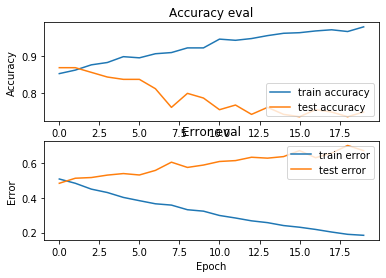

In [75]:
## plot of error and accuracy

def plot_history(history):
    """Plots accuracy/loss for training/validation set as a function of the epochs
        :param history: Training history of model
        :return:
    """

    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()
    
plot_history(history)

In [119]:
label_dict = {"blues":0,"classical":1,"country":2,"disco":3,"hiphop":4,"jazz":5,"metal":6,"pop":7,"reggae":8,"rock":9}

t=[]
for i in test:
    if i == "blues":
        t.append(0)
    elif i == "classical":
        t.append(1)
    elif i == "country":
        t.append(2)
    elif i == "disco":
        t.append(3)
    elif i == "hiphop":
        t.append(4)
    elif i == "jazz":
        t.append(5)
    elif i == "metal":
        t.append(6)
    elif i == "pop":
        t.append(7)
    elif i == "reggae":
        t.append(8)
    elif i == "rock":
        t.append(9)

In [120]:
t

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9]

In [121]:
## evaluation of CNN

y_pred = p
y_test = t

import numpy
import tensorflow as tf
tf.executing_eagerly()

m = tf.keras.metrics.Accuracy() 
_ = m.update_state(y_test, y_pred)
print("ACC: ",m.result().numpy())

m = tf.keras.metrics.MeanAbsoluteError() 
_ = m.update_state(y_test, y_pred) 
print("MSE: ",m.result().numpy())


m = tf.keras.metrics.RootMeanSquaredError()
m.update_state(y_test, y_pred)
print('RMSE: ', m.result().numpy())

ACC:  0.325
MSE:  2.24
RMSE:  3.127299
